Ce notebook sert a reproduire la page 1 du dashboard de Millman. Les valeurs utilisées sont celles de Open Damir.  
On commence par l'import des librairies:

In [5]:
import polars as pl
import matplotlib.pyplot as plt
import gc
import numpy as np
import pandas as pd

## Variations relatives N/N-1 du montant total des dépenses

### Variations Annuelles

On commence par les fonction qui manipule le mois

In [1]:
def depenses_mois(df):
    sum = df['FLT_PAI_MNT'].sum()
    print('          ·Depenses Calculées')
    return sum

def remboursements_mois(df):
    sum = df['FLT_REM_MNT'].sum()
    print('          ·Remboursements Calculés')
    return sum

def postes_mois(df):
    df_postes = df.group_by('PSP_ACT_SNDS'  ).agg(pl.sum('FLT_PAI_MNT').alias('FLT_PAI_MNT_POSTES'))
    return df_postes

Filtrer un dataset

In [2]:
def filtrer (df):
    print('          ·Filtrage en cours')
    df = df.filter(df['FLT_PAI_MNT'] > 0)
    df = df.filter(df['FLT_REM_MNT'] > 0)
    return df

S'en suit une fonction qui agrége la somme durant l'année:

In [3]:
def traitement_annee(year):
    # Initialisation des variables
    depenses_mensuelles = []
    remboursements_mensuels = []
    depenses_postes = []
    # Traitement des données mensuelles
    for i in range(2):
        if i == 1: n,m = 0,3
        else: n,m = 1,10
        for j in range(n,m):
            # Lecture du fichier du mois
            print('     - [ Mois',10*i+j,"] Début du traitement du mois")
            code_year = 'A'+str(year)
            code_month =  str(i)+str(j)+'.csv'
            path = "/raid/datasets/allianzsante/"+ code_year + '/'+code_year + code_month
            print('          ·Lecture du Fichier...')
            df_mensuel = pl.read_csv(path, separator=';', ignore_errors=True, columns=['PSP_ACT_SNDS', 'FLT_PAI_MNT', 'FLT_REM_MNT'])
            print('          ·Fichier lu')
            df_mensuel = filtrer(df_mensuel)
            print('          ·Filtrage terminé')
            # Traitement des données du mois
            depenses_mensuelles.append(depenses_mois(df_mensuel))
            remboursements_mensuels.append(remboursements_mois(df_mensuel))
            depenses_postes.append(postes_mois(df_mensuel))
            print('          ·Dépenses par Postes Calculées')
            # Suppresession des variables pour libérer de la mémoire
            del df_mensuel
            gc.collect()
    
    return depenses_mensuelles, remboursements_mensuels, depenses_postes

Ecrivons une fonction qui crée une liste des sommes de chaque année:

In [4]:
def traitement(debut):
    # Initialisation des variables
    depenses = []
    remboursements = []
    depenses_postes = []
    # Traitement annuel
    for annee in range(debut,2025):
        # Traitement annuel
        print('[',annee,"] Début du traitement de l'année")
        depenses_mensuelles, remboursements_mensuels, depenses_postes_mensuelles = traitement_annee(annee)
        depenses.append(depenses_mensuelles)
        remboursements.append(remboursements_mensuels)
        depenses_postes.append(depenses_postes_mensuelles)
        print('[',annee,"] Fin du traitement de l'année")
    return depenses, remboursements, depenses_postes

Code principale

In [6]:
depenses, remboursements, depenses_postes = traitement(debut=2019)

[ 2019 ] Début du traitement de l'année
     - [ Mois 1 ] Début du traitement du mois
          ·Lecture du Fichier...
          ·Fichier lu
          ·Filtrage en cours
          ·Filtrage terminé
          ·Depenses Calculées
          ·Remboursements Calculés
          ·Dépenses par Postes Calculées
     - [ Mois 2 ] Début du traitement du mois
          ·Lecture du Fichier...
          ·Fichier lu
          ·Filtrage en cours
          ·Filtrage terminé
          ·Depenses Calculées
          ·Remboursements Calculés
          ·Dépenses par Postes Calculées
     - [ Mois 3 ] Début du traitement du mois
          ·Lecture du Fichier...
          ·Fichier lu
          ·Filtrage en cours
          ·Filtrage terminé
          ·Depenses Calculées
          ·Remboursements Calculés
          ·Dépenses par Postes Calculées
     - [ Mois 4 ] Début du traitement du mois
          ·Lecture du Fichier...
          ·Fichier lu
          ·Filtrage en cours
          ·Filtrage terminé
          

In [29]:

mois =  ['01','02', '03', '04', '05', '06', '07', '08', '09', '10','11','12']
annee = ['2019', '2020', '2021', '2022', '2023', '2024']

for i in range(6):
    for j in range(12):
        jour = annee[i] + '-' + mois[j]
        depenses_postes[i][j] = depenses_postes[i][j].with_columns(pl.lit(jour).alias('Month'))

liste = [df for df in depenses_postes[i] for i in range(6)]
depenses_postes = pl.concat(liste)


TypeError: cannot use `__setitem__` on DataFrame with key 0 of type 'int' and value shape: (1, 3)
┌──────────────┬────────────────────┬─────────┐
│ PSP_ACT_SNDS ┆ FLT_PAI_MNT_POSTES ┆ Month   │
│ ---          ┆ ---                ┆ ---     │
│ i64          ┆ f64                ┆ str     │
╞══════════════╪════════════════════╪═════════╡
│ 0            ┆ 1.2809e10          ┆ 2019-01 │
└──────────────┴────────────────────┴─────────┘ of type 'DataFrame'

Valeurs annuelles

In [ ]:
remboursements_annuels = [sum(remboursements[i]) for i in range(len(remboursements))]
depenses_annuelles = [sum(depenses[i]) for i in range(len(depenses))]
# keys = list(depenses_postes.keys())
# depenses_postes_annuelles_en_milliards = {key: [int(sum(depenses_postes[key][i])/100000000)/10 for i in range(len(depenses_postes[key]))] for key in keys}

variation_annuelle_depenses = [(depenses_annuelles[i+1]/depenses_annuelles[i])-1 for i in range(len(depenses_annuelles)-1)]
variation_annuelle_remboursements = [(remboursements_annuels[i+1]/remboursements_annuels[i])-1 for i in range(len(remboursements_annuels)-1)]


annees = [i for i in range(2020,2025)]

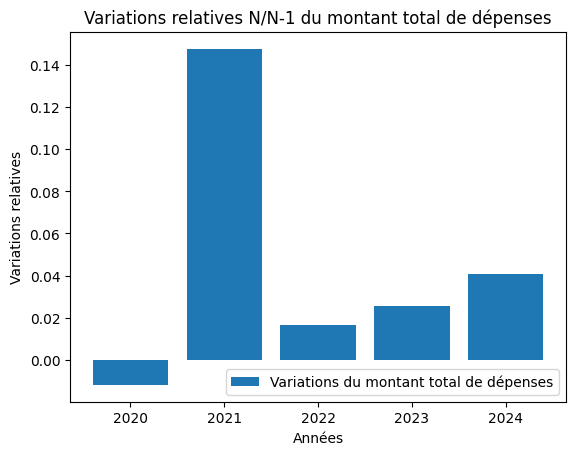

[-0.011978423725757859, 0.1476364694983896, 0.016349400207974485, 0.025506955603633363, 0.04080079811039372]


In [10]:
plt.bar(annees, variation_annuelle_depenses, label='Variations du montant total de dépenses')
plt.xlabel('Années')
plt.ylabel('Variations relatives')
plt.title('Variations relatives N/N-1 du montant total de dépenses')
plt.legend()
plt.show()
print(variation_annuelle_depenses)


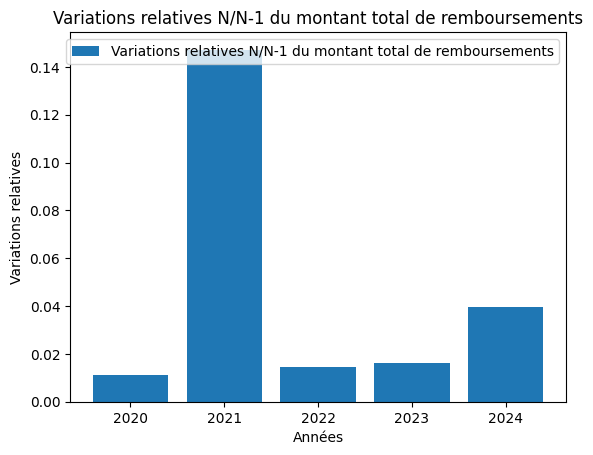

[0.011035233276211143, 0.14720072930652606, 0.014619389032206831, 0.01625169372936197, 0.03947917800603795]


In [11]:
plt.bar(annees, variation_annuelle_remboursements, label='Variations relatives N/N-1 du montant total de remboursements')
plt.xlabel('Années')
plt.ylabel('Variations relatives')
plt.title('Variations relatives N/N-1 du montant total de remboursements')
plt.legend()
plt.show()
print(variation_annuelle_remboursements)